##### last version

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, precision_recall_curve, roc_curve, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, average_precision_score, roc_auc_score, auc
import joblib

In [2]:
df = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\report\data\Azerbaijan_bank_customers.csv')

In [3]:
df

,customer_id,name_surname,age,gender,email,phone,account_type,balance,branch,credit_rating,...,monthly_income,credit_eligible,country,account_creation_date,tenure,num_of_products,has_credit_card,is_active_member,estimated_salary,churn
0,MST00000,Şəbnəm Mürsəlova,68,Qadın,şəbnəm.mürsəlova77@gmail.com,994559628459,Depozit,19091.12,Gəncə,835,...,6638.06,True,Azərbaycan,2017-07-05,8,2,1,0,16819.50,0
1,MST00001,Elnur Əliyev,20,Kişi,elnur.əliyev82@gmail.com,994507213659,Depozit,23188.34,Zaqatala,680,...,9984.26,False,Azərbaycan,2023-05-01,2,2,1,0,17785.62,1
2,MST00002,Kəmalə Mürsəlova,26,Qadın,kəmalə.mürsəlova86@gmail.com,994514956246,Depozit,14717.23,Mingəçevir,348,...,9906.09,False,Azərbaycan,2018-08-21,7,3,1,0,8226.90,1
3,MST00003,Ülviyyə Orucova,67,Qadın,ülviyyə.orucova82@gmail.com,994541336014,Əmanət,1982.79,Mingəçevir,572,...,807.34,False,Azərbaycan,2022-12-17,3,3,1,0,7920.16,0
4,MST00004,Kəmalə İsmayılova,39,Qadın,kəmalə.i̇smayılova28@gmail.com,994525011797,Biznes,10506.72,Zaqatala,368,...,8277.26,False,Azərbaycan,2019-02-02,6,3,0,1,13253.36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,MST19995,Nihat Nəbiyev,27,Kişi,nihat.nəbiyev93@gmail.com,994552405605,Depozit,24757.03,Sumqayıt,624,...,8957.56,False,Azərbaycan,2020-09-07,5,2,1,0,14391.58,0
19996,MST19996,Fərid Mahmudov,19,Kişi,fərid.mahmudov82@gmail.com,994507420662,Cari,1930.18,Naxçıvan,646,...,1744.60,False,Azərbaycan,2024-12-21,1,2,1,1,19697.54,0
19997,MST19997,Günay Ələkbərova,33,Qadın,günay.ələkbərova51@gmail.com,994556698675,Biznes,9064.50,Quba,310,...,7954.06,False,Azərbaycan,2025-04-24,0,2,1,0,5724.32,1
19998,MST19998,Xuraman Hüseynova,29,Qadın,xuraman.hüseynova34@gmail.com,994514904907,Depozit,11308.04,Lənkəran,703,...,5597.78,True,Azərbaycan,2023-06-18,2,2,1,0,16975.77,1


In [4]:
df['churn'].value_counts()

churn
0    14919
1     5081
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            20000 non-null  object 
 1   name_surname           20000 non-null  object 
 2   age                    20000 non-null  int64  
 3   gender                 20000 non-null  object 
 4   email                  20000 non-null  object 
 5   phone                  20000 non-null  int64  
 6   account_type           20000 non-null  object 
 7   balance                20000 non-null  float64
 8   branch                 20000 non-null  object 
 9   credit_rating          20000 non-null  int64  
 10  is_active              20000 non-null  bool   
 11  last_transaction_date  20000 non-null  object 
 12  monthly_income         20000 non-null  float64
 13  credit_eligible        20000 non-null  bool   
 14  country                20000 non-null  object 
 15  ac

In [6]:
df.describe()

,age,phone,balance,credit_rating,monthly_income,tenure,num_of_products,has_credit_card,is_active_member,estimated_salary,churn
count,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,46.495300,9.945303e+11,9454.990717,575.708200,5164.782587,4.54030,2.362950,0.651750,0.371350,10555.269470,0.254050
std,16.664107,1.726751e+07,6842.711465,158.593621,2809.059493,3.20604,0.993512,0.476428,0.483178,5511.175399,0.435337
min,18.000000,9.945010e+11,207.250000,300.000000,301.040000,0.00000,1.000000,0.000000,0.000000,1000.650000,0.000000
25%,32.000000,9.945152e+11,4065.377500,439.000000,2718.225000,2.00000,2.000000,0.000000,0.000000,5752.780000,0.000000
50%,47.000000,9.945297e+11,7999.615000,575.000000,5192.675000,4.00000,2.000000,1.000000,0.000000,10603.890000,0.000000
75%,61.000000,9.945453e+11,13315.875000,713.000000,7601.367500,7.00000,3.000000,1.000000,1.000000,15353.385000,1.000000
max,75.000000,9.945600e+11,39830.140000,850.000000,9999.750000,10.00000,4.000000,1.000000,1.000000,19998.700000,1.000000


In [7]:
df.isna().sum()

customer_id              0
name_surname             0
age                      0
gender                   0
email                    0
phone                    0
account_type             0
balance                  0
branch                   0
credit_rating            0
is_active                0
last_transaction_date    0
monthly_income           0
credit_eligible          0
country                  0
account_creation_date    0
tenure                   0
num_of_products          0
has_credit_card          0
is_active_member         0
estimated_salary         0
churn                    0
dtype: int64

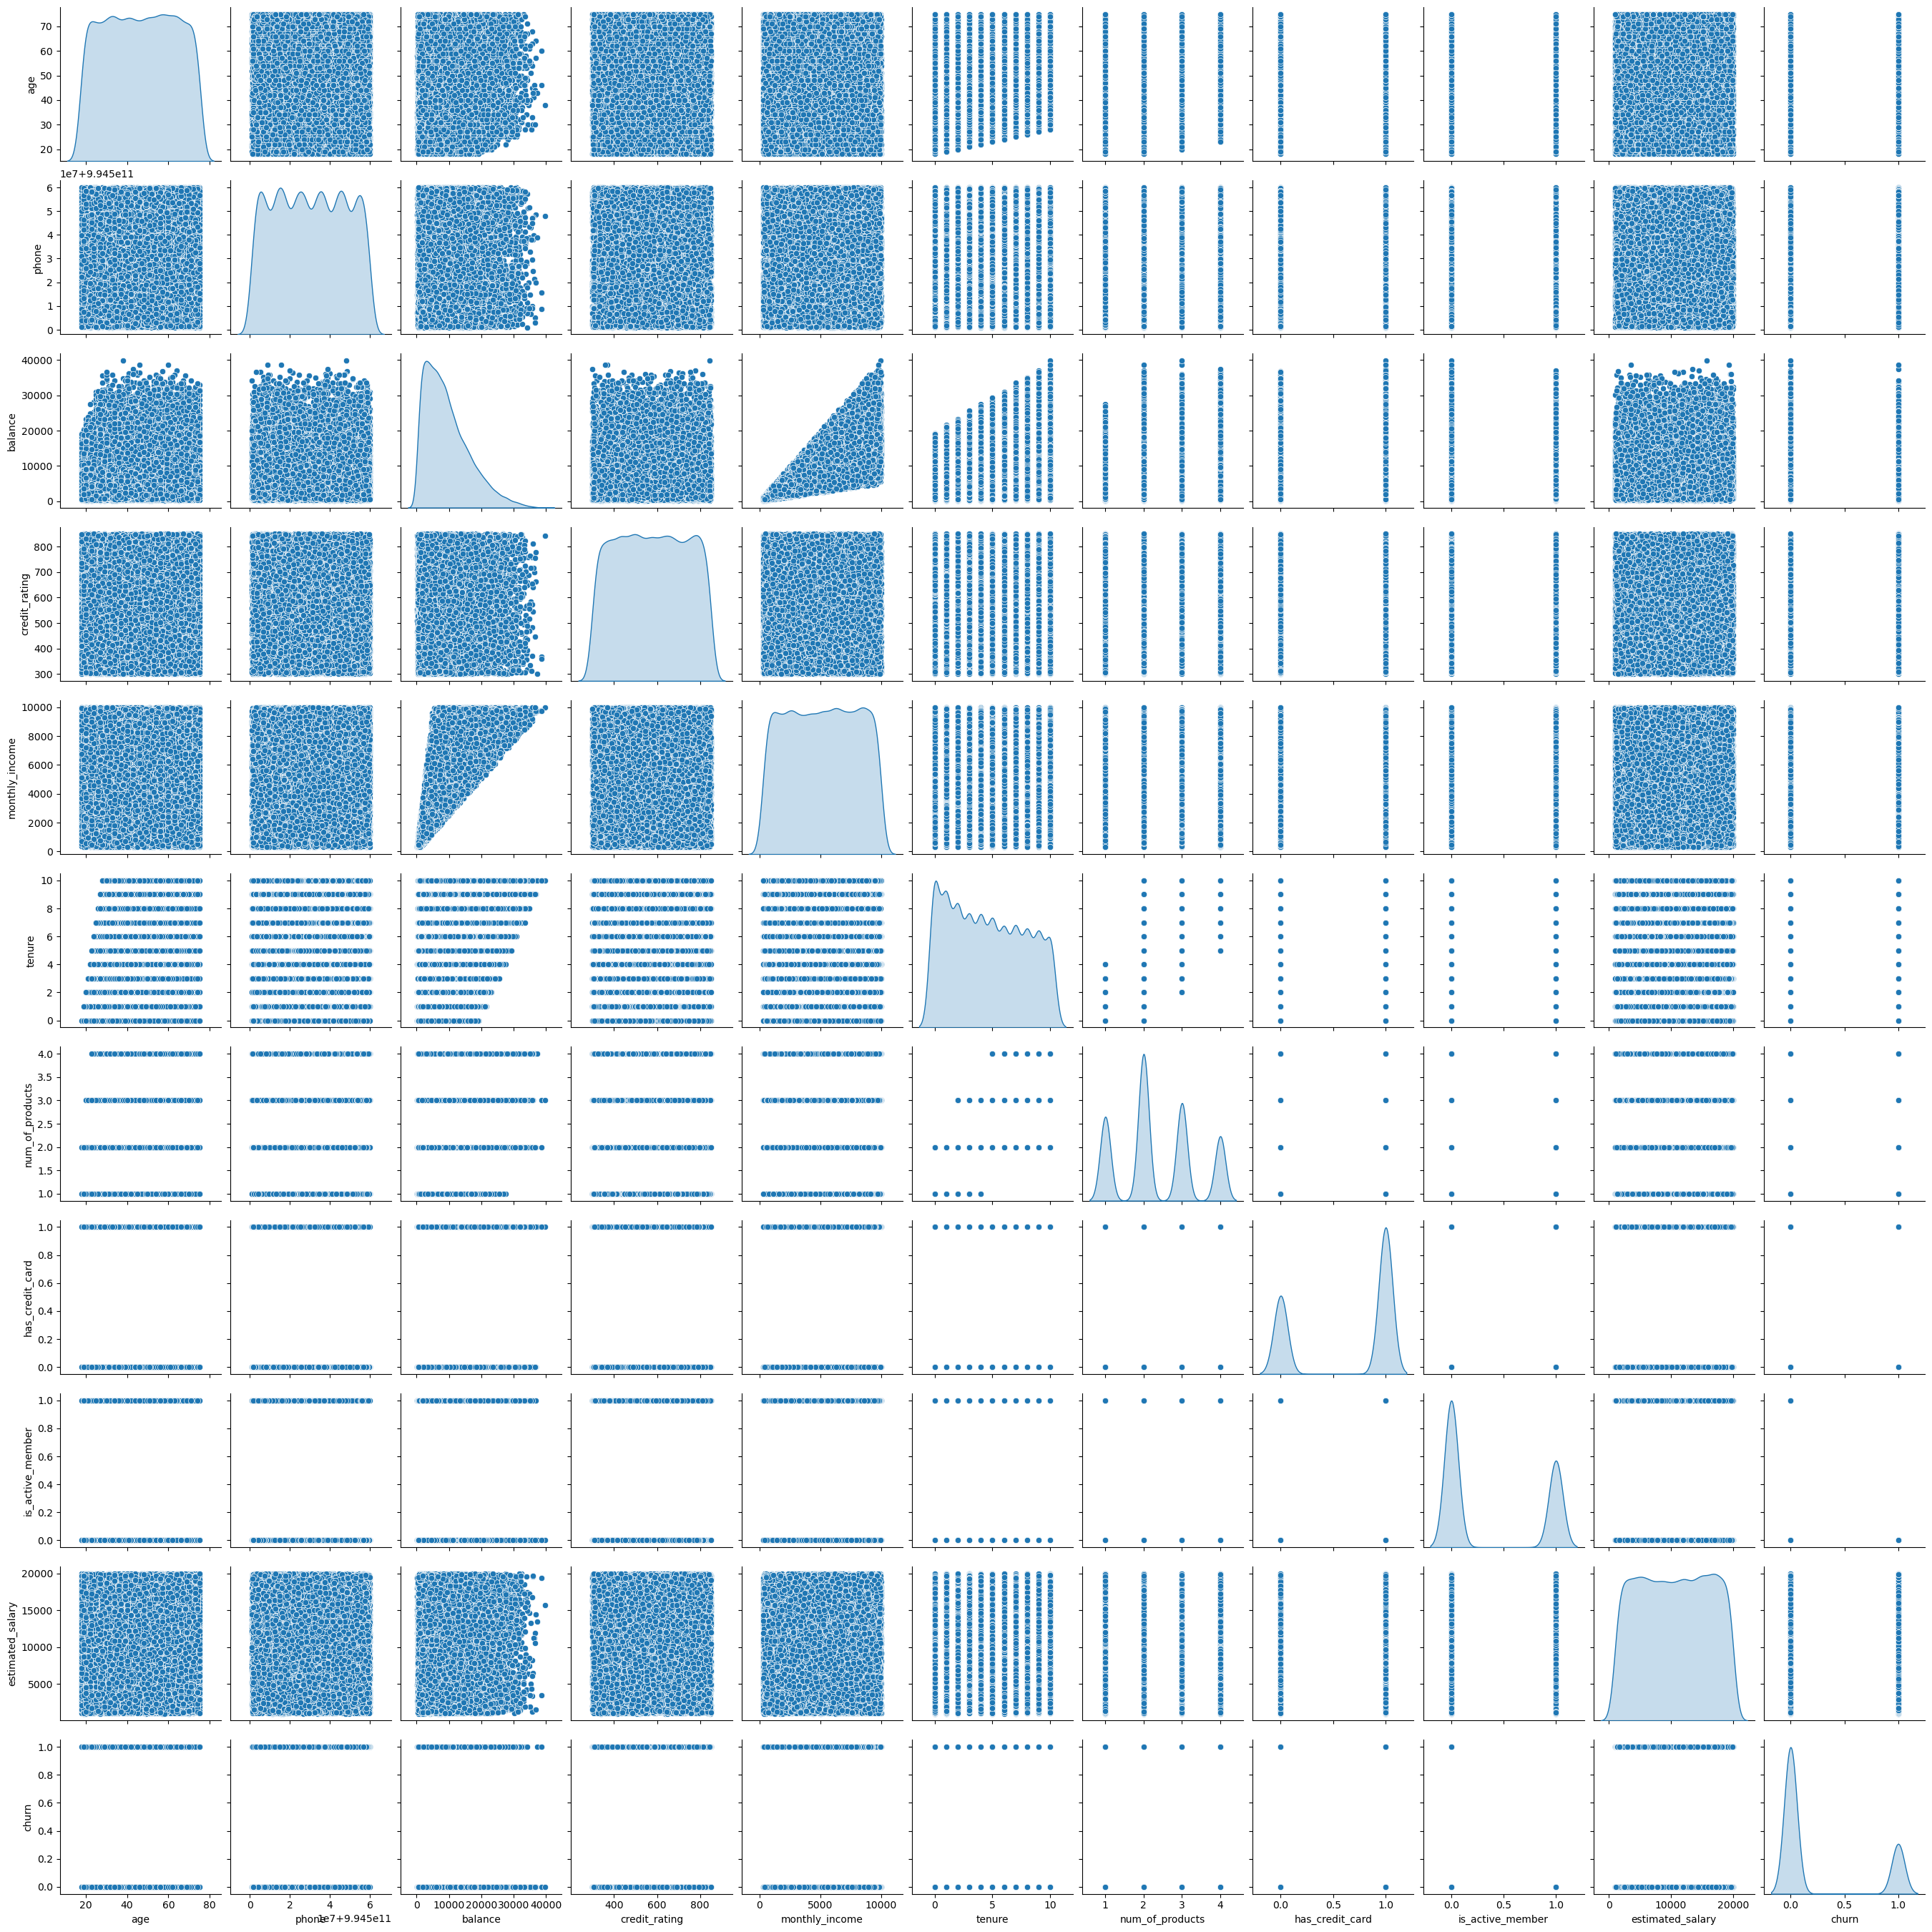

In [8]:
sns.pairplot(df.select_dtypes(include='number'), diag_kind='kde') 
plt.show()

<Axes: >

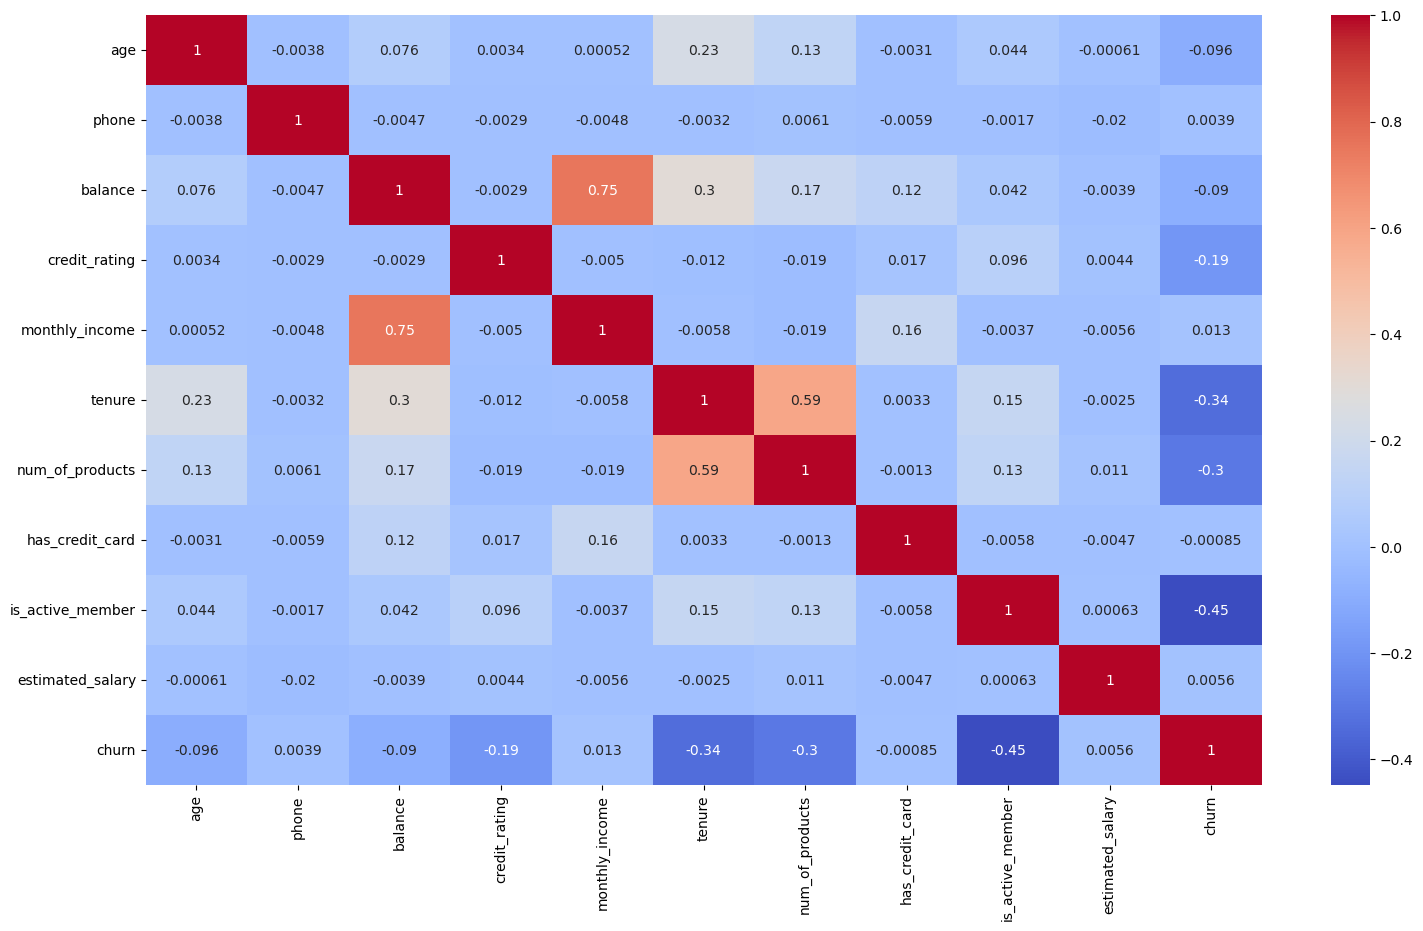

In [9]:
plt.figure(figsize=(18,10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')

##### Creating test and train data

In [5]:
df.drop(['customer_id', 'name_surname', 'email', 'phone', 'country', 'account_creation_date', 'last_transaction_date', 'is_active_member'], axis=1, inplace=True)

In [6]:
df = pd.get_dummies(df, columns=['account_type', 'branch'], prefix=['account', 'branch'])
df['gender'] = df['gender'].map({"Qadın": 0, "Kişi": 1})

In [11]:
df_churn_0 = df[df['churn'] == 0]
df_churn_1 = df[df['churn'] == 1]

In [12]:
train_0 = df_churn_0.sample(n=4039, random_state=42)
train_1 = df_churn_1.sample(n=4000, random_state=24)

In [13]:
remaining_0 = df_churn_0.drop(train_0.index)
remaining_1 = df_churn_1.drop(train_1.index)

In [14]:
test_0 = remaining_0.sample(n=2004, random_state=89)
test_1 = remaining_1.sample(n=1081, random_state=19)

In [15]:
train_data = pd.concat([train_0, train_1]).sample(frac=1, random_state=7).reset_index(drop=True)
test_data = pd.concat([test_0, test_1]).sample(frac=1, random_state=8).reset_index(drop=True)

In [16]:
X_train = train_data.drop("churn", axis=1)
y_train = train_data["churn"]

X_test = test_data.drop("churn", axis=1)
y_test = test_data["churn"]

In [17]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
X_test_scaled.shape, y_test.shape, X_train_scaled.shape, y_train.shape

((3085, 26), (3085,), (8039, 26), (8039,))

In [19]:
sgd_clf = GradientBoostingClassifier(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
log_reg = LogisticRegression(random_state=42)

models = [rnd_clf, sgd_clf, log_reg]
results = list()

for model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    results.append({
        "Model": model.__class__.__name__,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

metrics_df_test = pd.DataFrame(results)
metrics_df_test

,Model,Accuracy,Precision,Recall,F1 Score
0,RandomForestClassifier,0.795138,0.795577,0.824634,0.790541
1,GradientBoostingClassifier,0.790600,0.801137,0.829449,0.787627
2,LogisticRegression,0.778930,0.771317,0.797033,0.771700


In [20]:
rnd_clf.fit(X_train_scaled, y_train)
y_pred = rnd_clf.predict(X_test_scaled)

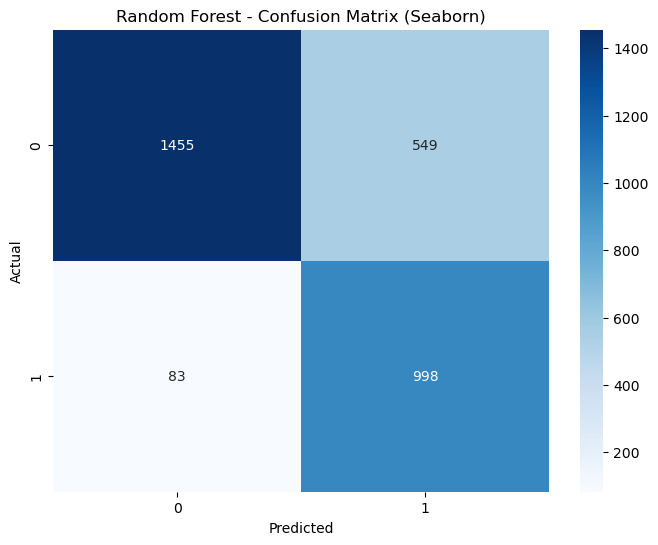

In [21]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix (Seaborn)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

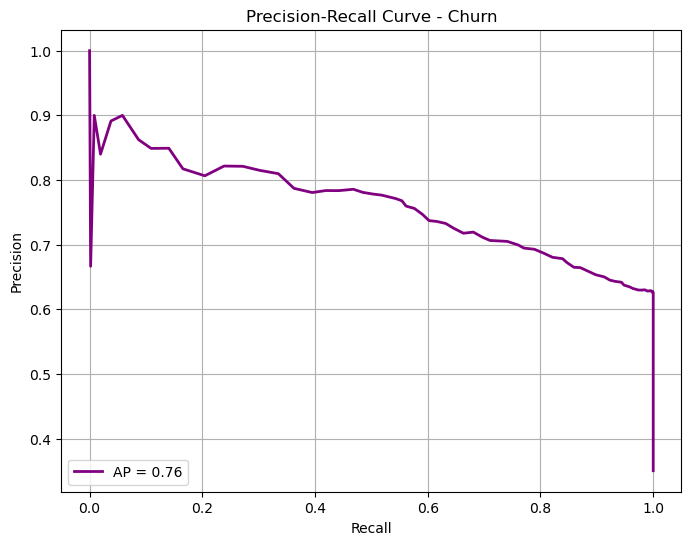

In [22]:
y_probs = rnd_clf.predict_proba(X_test_scaled)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
avg_precision = average_precision_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2, label='AP = %0.2f' % avg_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Churn')
plt.legend(loc='lower left')
plt.grid()
plt.show()

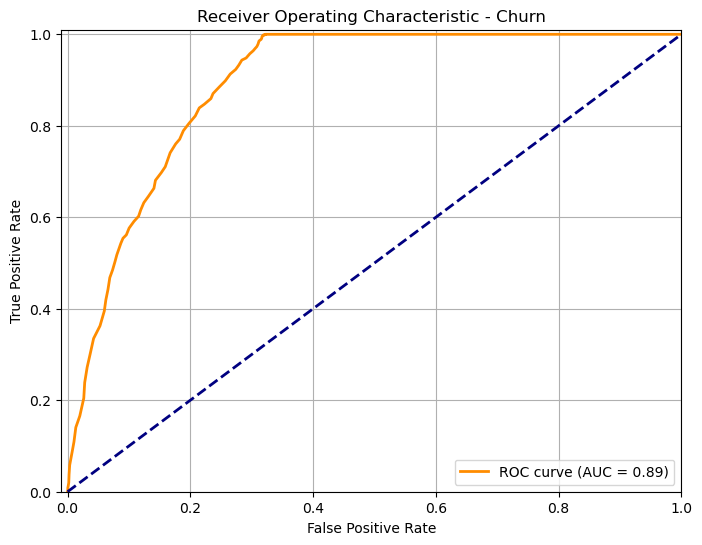

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Churn')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [24]:
joblib.dump(rnd_clf, 'model.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']